<a href="https://colab.research.google.com/github/nehakardam/Continous-Space-Learning-Processing/blob/main/bigramfreq_dist_FS_april2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/QualitativeFacSupportData_April2023_ThroughSpring2022.xlsx'
df = pd.read_excel(file_path)

print(df.head())

   TeachingCode  RemoteTrad        Subject Code             Class Quarter  \
0         231.0         2.0  EE215_WTR2021_AF_1  EE215_Winter2021  Winter   
1         231.0         2.0  EE215_WTR2021_AD_1  EE215_Winter2021  Winter   
2         231.0         2.0  EE215_WTR2021_AC_1  EE215_Winter2021  Winter   
3         231.0         2.0  EE215_WTR2021_AA_1  EE215_Winter2021  Winter   
4         231.0         2.0  EE215_WTR2021_AB_1  EE215_Winter2021  Winter   

     Year Section A1_Status A2_Major A3.1  ... B12.7  \
0  2021.0      AF         3        1    1  ...     0   
1  2021.0      AD         2        1    1  ...     0   
2  2021.0      AC         2        1    1  ...     0   
3  2021.0      AA         2        1    1  ...     0   
4  2021.0      AB         2        3    1  ...     0   

                                                 SA1       Code Problems  \
0  I think that one thing that would be helpful f...         OH      0.0   
1              Upload recording with notes on cl

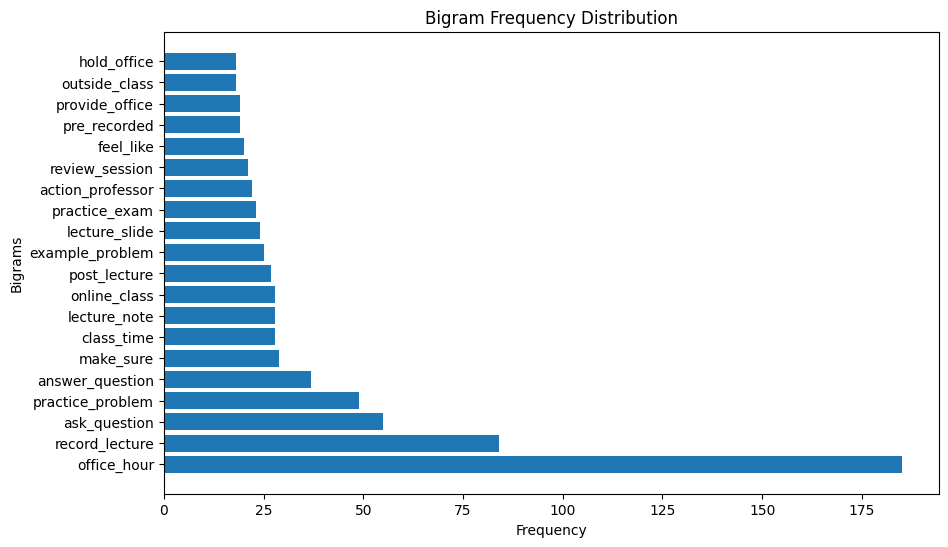

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.phrases import Phrases, Phraser
import matplotlib.pyplot as plt
import spacy
import re
import pandas as pd

nlp = spacy.load("en_core_web_sm")
# Define a function to preprocess the text data
def preprocess_text(SA1):
    doc1 = nlp(" ".join(SA1).lower())
    preprocessed_txt = [str(token.lemma_) for token in doc1 if not token.is_stop and not token.is_punct and not token.is_digit and token.is_ascii]
    return preprocessed_txt

# Call the preprocess_text function on the "SA1" column of the DataFrame
df['SA1'] = df.SA1.apply(lambda x: preprocess_text(x) if isinstance(x, list) else [])

# Create bigrams and trigrams from the preprocessed text
bigram = Phrases(df['SA1'], min_count=5, threshold=100)
trigram = Phrases(bigram[df['SA1']], threshold=100)
bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)
df['SA1_bigram'] = df['SA1'].apply(lambda x: bigram_mod[x] if isinstance(x, list) else [])
df['SA1_trigram'] = df['SA1'].apply(lambda x: trigram_mod[bigram_mod[x]] if isinstance(x, list) else [])
ata_bigrams = [bigram[sentence] for sentence in df['SA1']]

# Define a function to filter phrases by type
def is_phrase_of_type(word, phrase_type):
    if phrase_type == "bigram":
        substring = "[a-z]+(_)[a-z]+"
    else:
        substring = "[a-z]+(_)[a-z]+(_)[a-z]+"
    if re.search(substring, word):
        return True
    return False

# Define a function to count the frequency of phrases
def frequency_dictionary(data, phrase_type):
    count_dict = {}
    for sentence in data:
        for word in sentence:
            if is_phrase_of_type(word, phrase_type):
                if word in count_dict.keys():
                    count_dict[word] = count_dict[word] + 1
                else:
                    count_dict[word] = 1
            else:
                pass
    return count_dict

# Generate a frequency distribution of bigrams
bigram_count_dict = frequency_dictionary(data_bigrams, "bigram")
bigram_data_items = bigram_count_dict.items()
bigram_data_list = list(bigram_data_items)
bigram_df = pd.DataFrame(bigram_data_list, columns=['word', 'count'])
bigram_df = bigram_df.sort_values(by=['count'], ascending=False, ignore_index=True).head(20)

# Plot the frequency distribution as a bar graph
plt.rcParams["figure.figsize"] = (10, 6)
y = bigram_df['word']
x = bigram_df['count']
plt.barh(y, x)
plt.ylabel("Bigrams")
plt.xlabel("Frequency") 
plt.title("Bigram Frequency Distribution")
plt.show()


# New Section